C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10196\2811979570.py:34: RuntimeWarning: overflow encountered in exp
  return np.exp(np.sum((vr-para2[0])**2)/(2*para2[1]**2)+np.log(para2[1])*n-np.sum((vr-para1[0])**2)/(2*para1[1]**2)-np.log(para1[1])*n)


0.3303090909090909


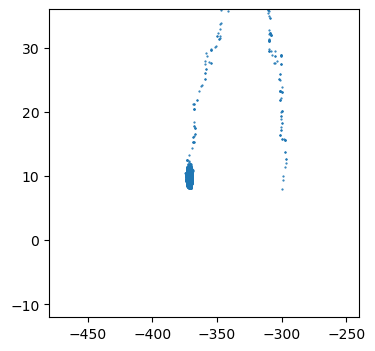

(2, 110000)


In [227]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


def metropolis(func, steps, init_para, exp_func, burn_in=None) :
    if burn_in is None :
        burn_in = int(0.1*steps)
    steps += burn_in
    hist = []
    dump = []
    pos = np.array(init_para)
    for step in range(steps) :
        hist += [pos]
        new_pos = pos + exp_func()
        if new_pos[1]>0 and random.random()<min(1, func(new_pos,pos)) :
            pos = new_pos
        else :
            dump += [new_pos]
            
    df = pd.DataFrame(np.array(hist), columns=["vr", "sigma"])
    return np.array(hist), np.array(dump)


def lnG(x,x0,sig) :
    return -(x-x0)**2/(2*sig**2)-np.log(sig)

data_path = '../Materials/data/'
data = pd.read_csv(data_path+'Cas3.csv')
vr = np.array(data['vr'])
n = len(vr)
init_para = [-300,8]
#func = lambda para1,para2: np.exp(np.sum(lnG(vr,*para1))-np.sum(lnG(vr,*para2)))
def func(para1, para2) :
    return np.exp(np.sum((vr-para2[0])**2)/(2*para2[1]**2)+np.log(para2[1])*n-np.sum((vr-para1[0])**2)/(2*para1[1]**2)-np.log(para1[1])*n)
def exp_func(sx,sy) :
    def f() :
        return np.array([random.gauss(0, sx), random.gauss(0, sy)])
    return f
def analyse() :
    hist, dump = metropolis(func=func, steps=100000, init_para=init_para, exp_func=exp_func(1,1))
    print(1-len(dump)/(len(hist)))
    if False :
        return
    plt.figure(figsize=(4,4))
    plt.xlim(-480,-240)
    plt.ylim(-12,36)
    plt.scatter(*hist.T,alpha=1,s=0.3)
    plt.show()
    df.to_csv("output.csv", index=False)
analyse()

In [73]:
n = len(vr)
def func(para1, para2) :
    return np.sum((vr-para2[0])**2)/(2*para2[1]**2)+np.log(para2[1])*n-np.sum((vr-para1[0])**2)/(2*para1[1]**2)-np.log(para1[1])*n
np.exp(func(np.array([300,10]),np.array([300,9])))<1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10196\3055764961.py:4: RuntimeWarning: overflow encountered in exp
  np.exp(func(np.array([300,10]),np.array([300,9])))<1


False